In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.style.use("quick.mplstyle")

In [31]:
n_nodes = [1, 2, 4, 8]
walltime = [(1240 + 1520)/2, (705 + 683)/2, (434+470)/2, (308+338)/2]

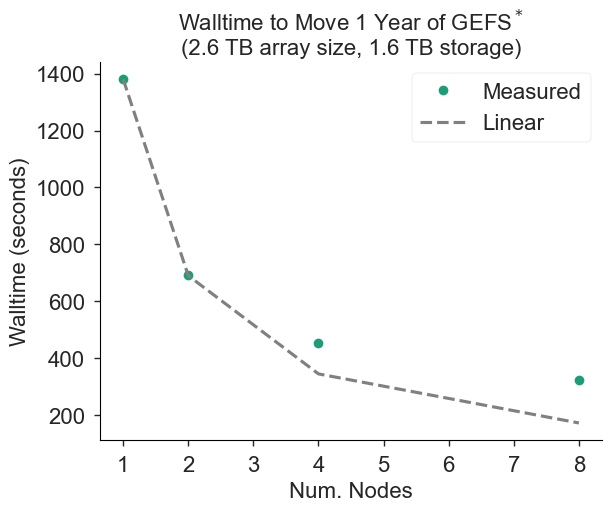

In [33]:
fig, ax = plt.subplots(figsize=(6,5), constrained_layout=True)

ax.plot(n_nodes, walltime, ls="", marker="o", label="Measured")
ax.plot(n_nodes, [walltime[0]/N for N in n_nodes], ls="--", color="gray", label="Linear")

plt.legend()
ax.set(
    title=f"Walltime to Move 1 Year of GEFS$^*$\n(2.6 TB array size, 1.6 TB storage)",
    ylabel="Walltime (seconds)",
    xlabel="Num. Nodes",
    xticks=[x+1 for x in range(8)]
);

fig.savefig("ufs2arco_mpidatamover_scaling.png", bbox_inches="tight", dpi=300)

In [34]:
import xarray as xr

In [45]:
import cartopy.crs as ccrs
import cartopy.feature as cf

In [67]:
import cmocean

In [35]:
ds = xr.open_zarr("gs://noaa-ufs-gefsv13replay/ufs-hr1/0.25-degree-subsampled/03h-freq/zarr/fv3.zarr", storage_options={"token": "anon"})

In [61]:
tmp = ds.tmp.sel(time="2022-03-03T12").load()

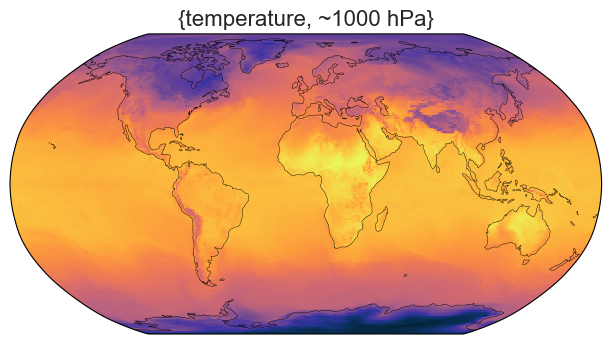

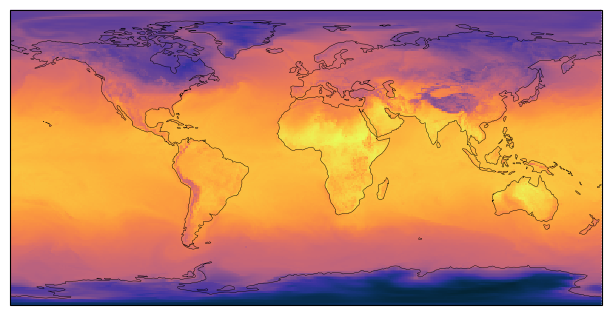

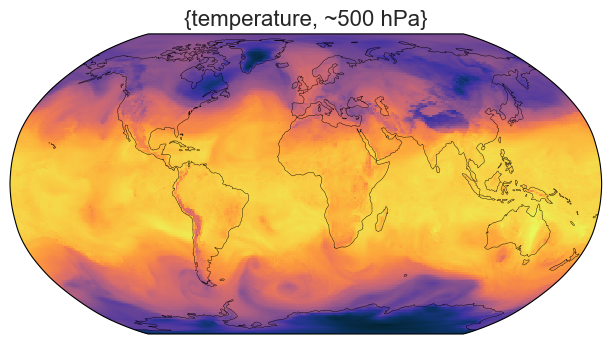

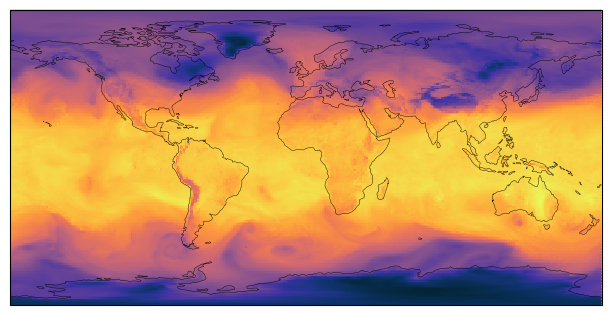

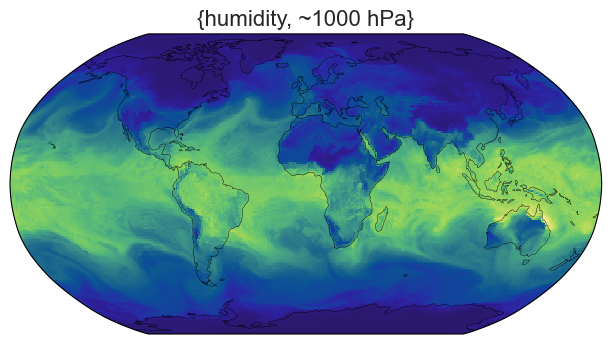

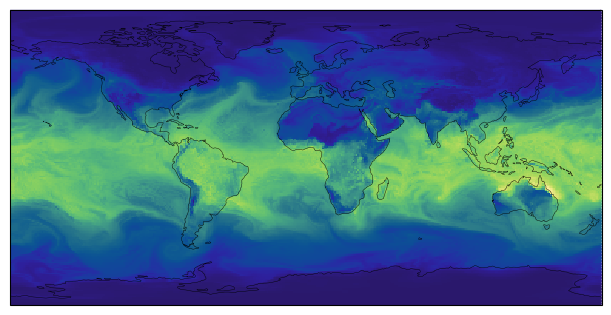

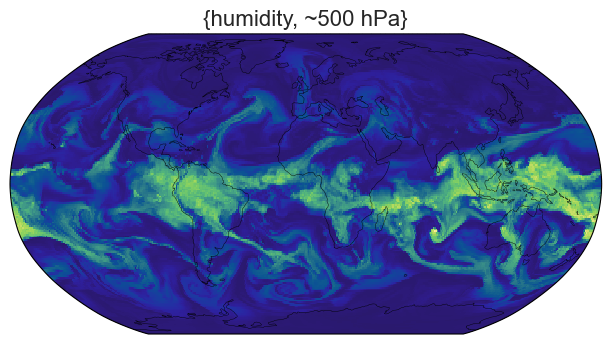

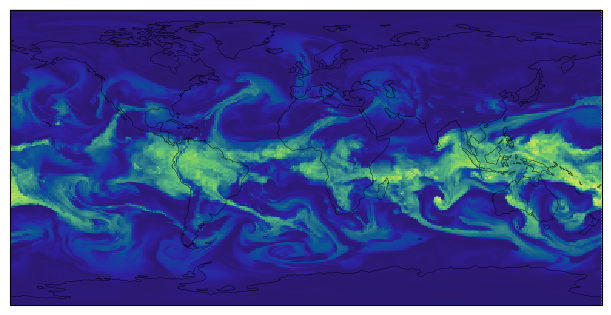

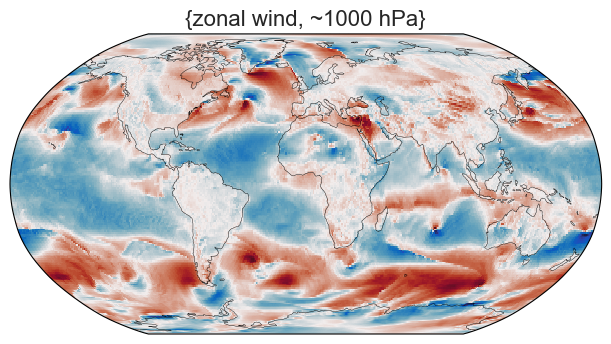

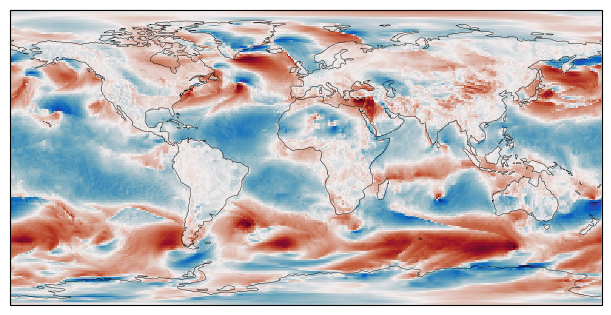

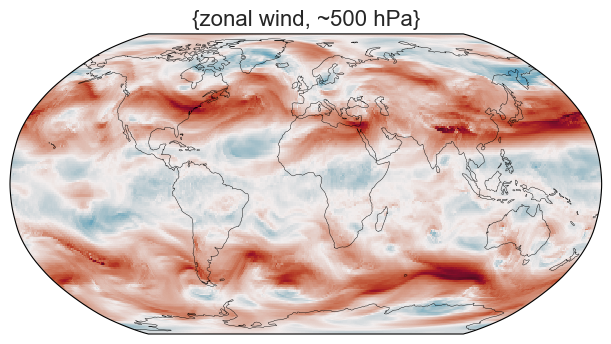

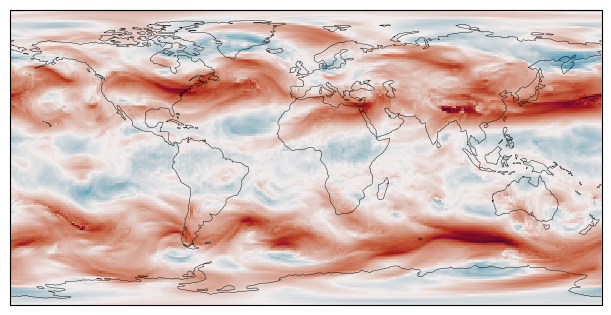

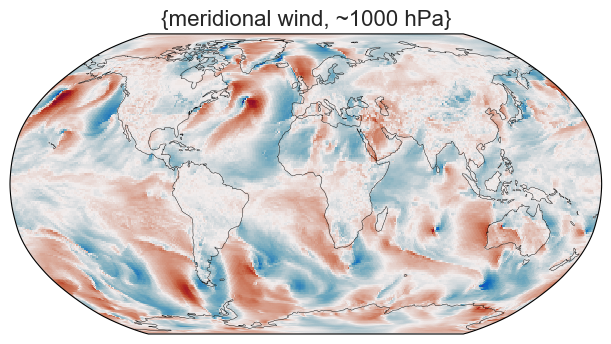

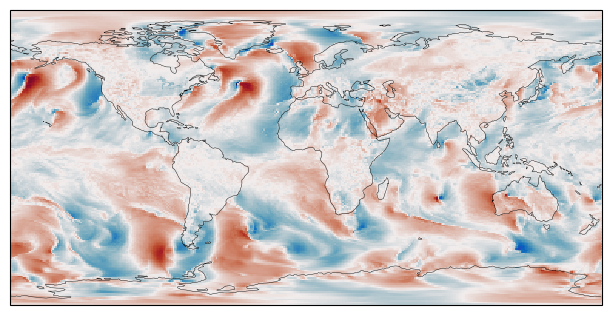

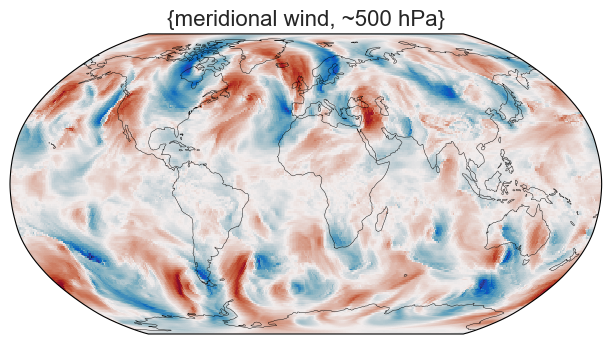

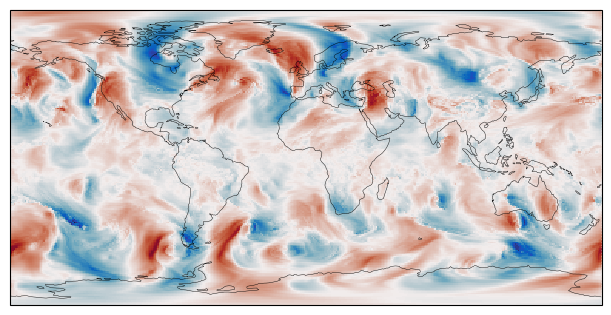

In [74]:
date = "2022-03-03T12"

for varname, nicename, cmap in zip(
    ["tmp", "spfh", "ugrd", "vgrd"],
    ["temperature", "humidity", "zonal wind", "meridional wind"],
    ["cmo.thermal", "cmo.haline", "cmo.balance", "cmo.balance"],
):
    for pfull in [1000, 500]:
        fig, ax = plt.subplots(figsize=(6,5), constrained_layout=True, subplot_kw={"projection": ccrs.Robinson()})
        ds[varname].sel(time=date).sel(pfull=pfull, method="nearest").plot(transform=ccrs.PlateCarree(), add_colorbar=False, cmap=cmap)
        ax.set(title="{"+f"{nicename}, ~{pfull} hPa"+"}")
        ax.coastlines()
        fig.savefig(f"ufs2arco-prez/{nicename}_{pfull}.jpeg", dpi=300, bbox_inches="tight")
        
        fig, ax = plt.subplots(figsize=(6,5), constrained_layout=True, subplot_kw={"projection": ccrs.PlateCarree()})
        ds[varname].sel(time=date).sel(pfull=pfull, method="nearest").plot(transform=ccrs.PlateCarree(), add_colorbar=False, cmap=cmap)
        ax.set(title="")
        ax.coastlines()
        fig.savefig(f"ufs2arco-prez/{nicename}_{pfull}_mercator.jpeg", dpi=300, bbox_inches="tight")

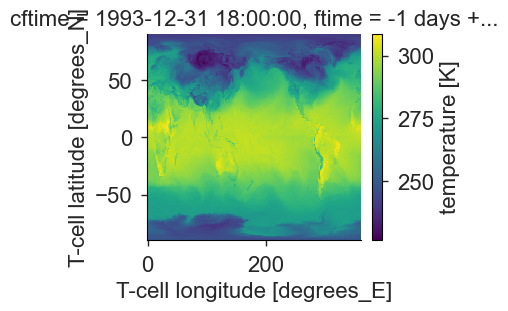

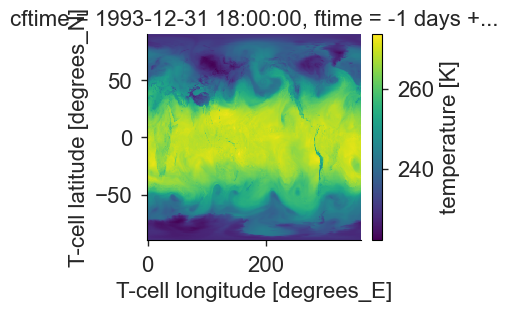

In [44]:
for key in [
    "tmp",
    #"spfh",
    #"ugrd",
    #"vgrd",
]:
    for level in [1000, 500]:
        for time in [0]:
            fig, ax = plt.subplots(constrained_layout=True)
            ds[key].sel(pfull=level, method="nearest").isel(time=time).plot(
                ax=ax,
            )